## Clustering
K-MEANS

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import datetime

In [5]:
%matplotlib inline

In [6]:
data = pd.read_csv('./meteo/minuto.csv')

In [7]:
data.shape

(1587257, 13)

In [8]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [9]:
sampled_df = data[(data['rowID']%10)==0]

In [10]:
sampled_df.shape

(158726, 13)

In [14]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [15]:
sampled_df[sampled_df['rain_accumulation']==0].shape

(157812, 13)

In [16]:
sampled_df[sampled_df['rain_duration']==0].shape

(157237, 13)

In [17]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

rows_before = sampled_df.shape[0]

sampled_df =sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [18]:
rows_before-rows_after


46

In [19]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [20]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [21]:
select_df = sampled_df[features]

In [22]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [23]:
x = StandardScaler().fit_transform(select_df)

In [24]:
x

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [25]:
kmeans = KMeans(n_clusters = 12)

In [26]:
model = kmeans.fit(x)

In [27]:
print("model\n",model)

model
 KMeans(n_clusters=12)


In [31]:
centers = model.cluster_centers_

In [32]:
centers

array([[-1.18022939, -0.87486111,  0.44717079,  1.97860436,  0.53903737,
         1.93980839,  0.91271127],
       [ 0.05689523, -0.78484777, -1.19528749, -0.57132101, -1.04120784,
        -0.5858784 ,  0.87631856],
       [ 1.37015981, -0.08407248, -1.20775704, -0.04198612, -1.07699151,
        -0.02134242, -0.97823548],
       [-0.6678744 ,  0.57323861,  0.18067529, -0.58979166,  0.35061998,
        -0.60326458, -0.14192145],
       [ 0.23723366, -0.99430043,  0.65839599, -0.54821912,  0.84942526,
        -0.53100072,  1.16558089],
       [ 0.12504642,  0.85281391,  1.4096089 , -0.63869262,  1.67363534,
        -0.58959497, -0.71455339],
       [-0.21623122,  0.63283456,  0.4080651 ,  0.73403179,  0.51615016,
         0.67203104, -0.14911849],
       [ 1.18950817, -0.25482894, -1.15496587,  2.12880463, -1.0533971 ,
         2.24616099, -1.13452065],
       [-0.15869929,  0.8612895 , -1.30972778, -0.59022811, -1.16518727,
        -0.60550411, -0.64373506],
       [ 0.77619124,  0.3829

In [40]:
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')
    
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    p = pd.DataFrame(Z, columns = colNames)
    p['prediction'] = p['prediction'].astype(int)
    return p

In [45]:
def parallel_plot(data):
    my_colors = list(islice(cycle(['b','r','g','y','k']), None, len(data)))
    plt.style.use("seaborn-dark")
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker = 'o')
p = pd_centers(features, centers)
p    

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-1.180229,-0.874861,0.447171,1.978604,0.539037,1.939808,0.912711,0
1,0.056895,-0.784848,-1.195287,-0.571321,-1.041208,-0.585878,0.876319,1
2,1.370160,-0.084072,-1.207757,-0.041986,-1.076992,-0.021342,-0.978235,2
3,-0.667874,0.573239,0.180675,-0.589792,0.350620,-0.603265,-0.141921,3
4,0.237234,-0.994300,0.658396,-0.548219,0.849425,-0.531001,1.165581,4
5,0.125046,0.852814,1.409609,-0.638693,1.673635,-0.589595,-0.714553,5
6,-0.216231,0.632835,0.408065,0.734032,0.516150,0.672031,-0.149118,6
7,1.189508,-0.254829,-1.154966,2.128805,-1.053397,2.246161,-1.134521,7
8,-0.158699,0.861290,-1.309728,-0.590228,-1.165187,-0.605504,-0.643735,8
9,0.776191,0.382946,0.296370,-0.523719,0.484500,-0.529021,-0.769501,9


## Dry days

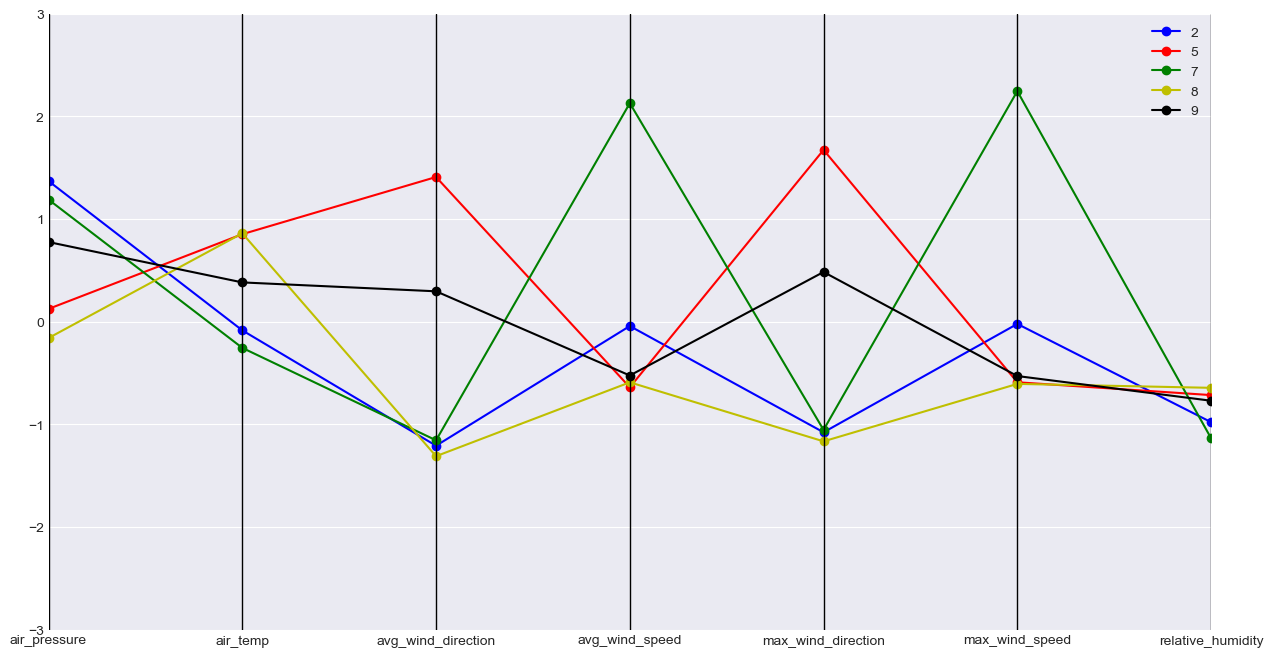

In [46]:
parallel_plot(p[p['relative_humidity']< -0.5])

## Warm days

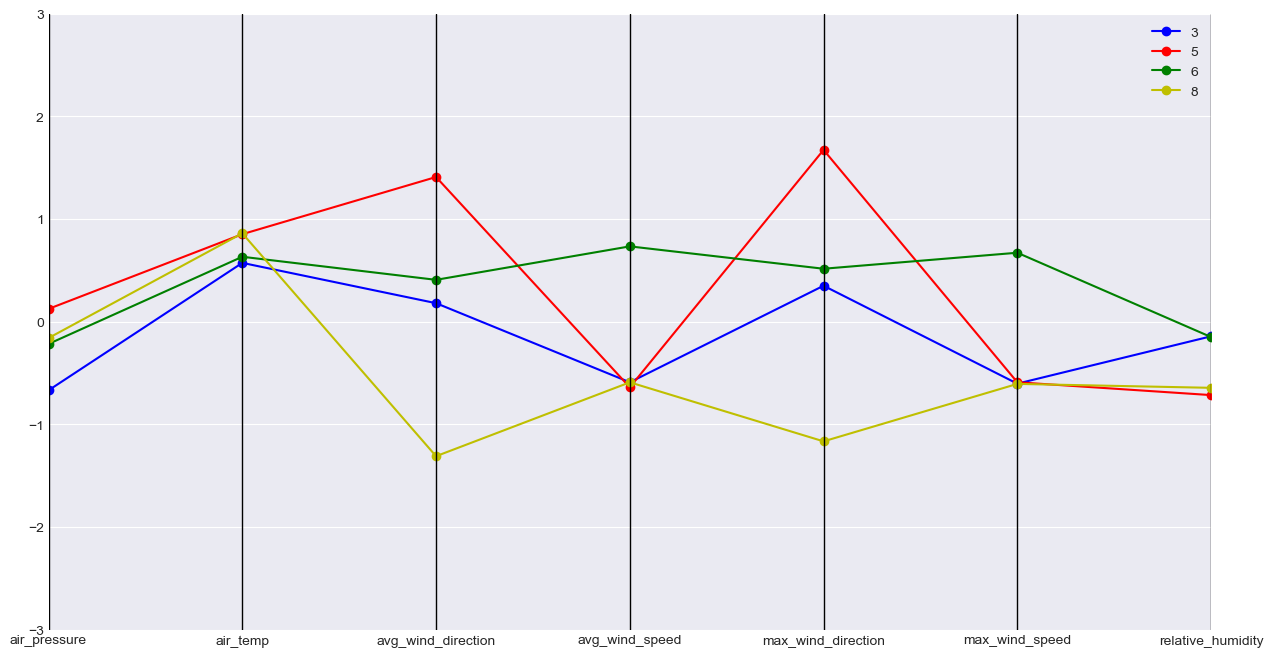

In [48]:
parallel_plot(p[p['air_temp']>0.5])

## Cool days

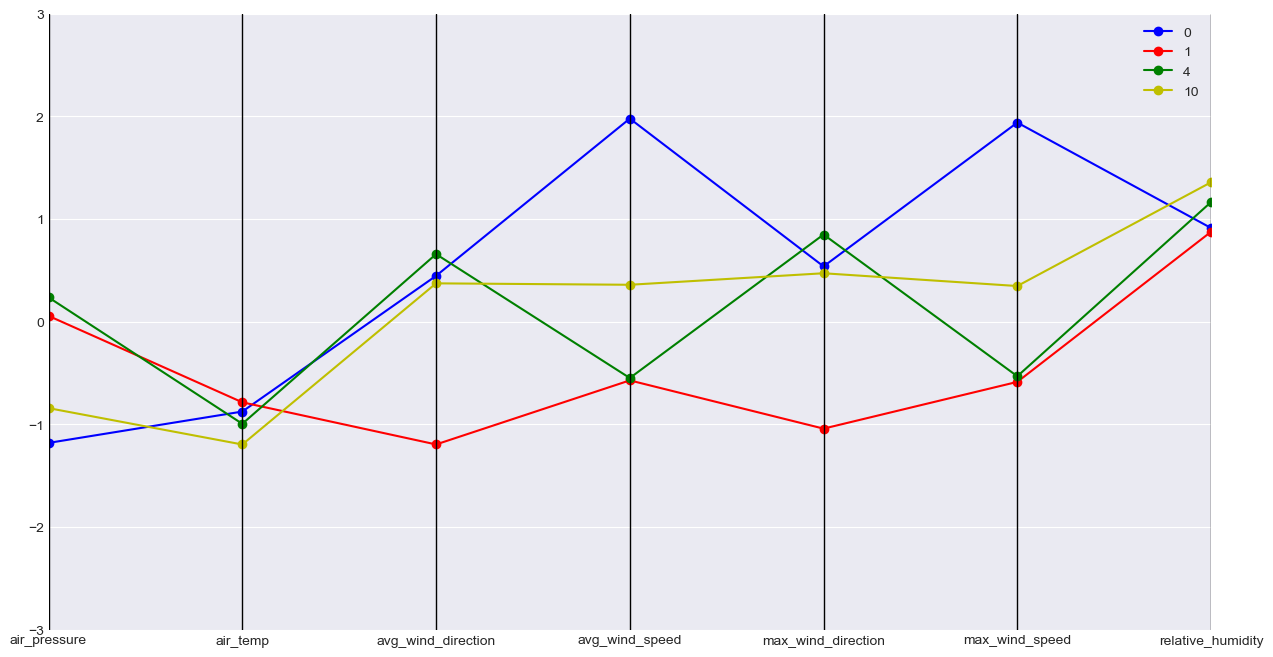

In [50]:
parallel_plot(p[(p['relative_humidity']>0.5)&(p['air_temp']<0.5)])